# Part I: K-means Segmentation

#<i>probability simplex</i> and distribution <i>entropy</i>
### The general concept of "entropy" is very important in science (statistics, physics, computer vision, ML, AI, information threory, data analysis, etc). The general formula for the entropy is $$H({\mathbf S}) = -\sum_k S^k \ln S^k$$ where $${\mathbf S}:= (S^1,...,S^K)\;\;\in \;\;\Delta^K $$ is any distribution over $K$ values (e.g. classes, categories, decisions, etc) and $\Delta^K:= \{p\in{\cal R}^K\;|p^k\geq 0,\;\sum_{k=1}^K p^k=1\}\subset {\cal R}^K$ is a so-called <i>probability simplex</i>. Probably the most basic property of entropy one should know is that it measures "randomness" of a distribution. 

### Below we visualize the entropy function $H: \Delta^K \rightarrow {\cal R}^1$ for $K=2$. In this simple case the distribution ${\mathbf S} = (S^1,S^2)$ may correspond to some binary random variable $X$ so that $S^1=Pr(X=1)$ and  $S^2=Pr(X=0)$. For example, $X$ could represent a binary decision about the category of an object observed in an image (person or not-a-person). Since $S^1+S^2=1$, probability simplex $\Delta^2$ has only one degree of freedom - one scalar is enough to represent an arbitrary binary distribution. It is easy to visualize the entropy function over all possible binary distributions ${\mathbf S}=(S^1,S^2)\in\Delta^2 $ as probability simplex  $\Delta^2 = \{(x,1-x)\,|\, 0\leq x\leq 1\}$  is a  line interval inside ${\cal R}^2$.

 <img src="images/simplex2.png" width="300" height="300"> 

$$\begin{align*} H(x) =& - \sum_{k} S^k \ln S^k  \\ =& - S^1 \ln S^1 - S^2 \ln S^2 \\ =& -x \ln x - (1-x) \ln (1-x)\end{align*}$$

C:\Users\dingj\AppData\Local\Temp\ipykernel_26088\2361486188.py:6: RuntimeWarning: divide by zero encountered in log
  y = - x * np.log(x) - (1 - x) * np.log(1 - x)
C:\Users\dingj\AppData\Local\Temp\ipykernel_26088\2361486188.py:6: RuntimeWarning: invalid value encountered in multiply
  y = - x * np.log(x) - (1 - x) * np.log(1 - x)


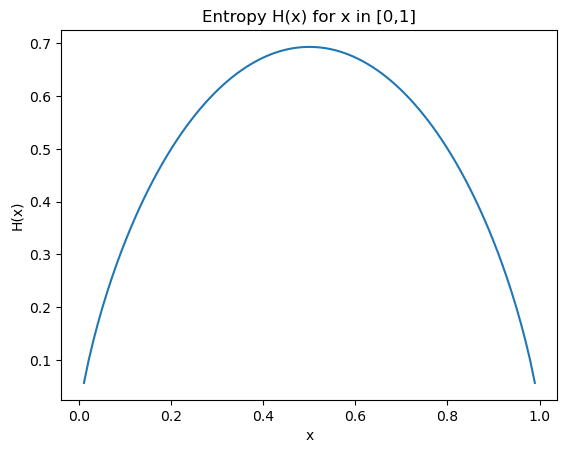

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
y = - x * np.log(x) - (1 - x) * np.log(1 - x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("H(x)")
plt.title("Entropy H(x) for x in [0,1]")
plt.show()

### The lowest entropy value is when $x = 0, 1$ and it corresponds to one-hot distribution i.e $S = (0,1)$ or $S = (1, 0)$
### The largest entropy value is $x = 0.5$ and it corresponds to $S = (0.5, 0.5)$

### Then entropy is lowest when there is little or no randomness. A distribution of $S = (0,1)$ or $S = (1, 0)$ implies we are certain about which $k$ we get, so there is no randomness and the corresponding entropy is the lowest. When there is more randomness, entropy is highest. A distribution of $S = (0.5, 0.5)$ is completely random since we are equally uncertain about whether $k=1$ or $k=2$ so the entropy is the highest.

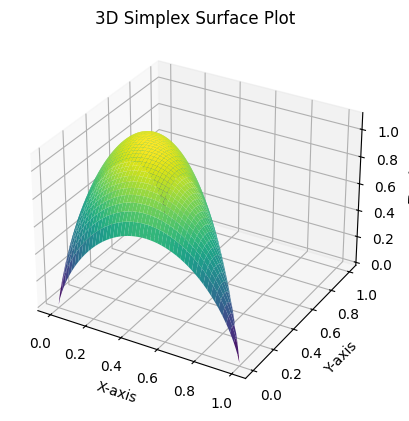

In [ ]:
# One can also visualize the entropy function over the probability simplex for K=3. 

from mpl_toolkits.mplot3d import Axes3D

# Define a small epsilon to prevent log(0) issues
epsilon = 1e-10  

# Ensure both x and y have the same number of points
x = np.linspace(0, 1, 100)  
y = np.linspace(0, 1, 100)  

X, Y = np.meshgrid(x, y)

# Compute Z only where X + Y <= 1
valid_mask = X + Y <= 1
Z = np.full_like(X, np.nan)  # Fill with NaN initially

# Compute entropy only where X + Y <= 1
Z[valid_mask] = -X[valid_mask] * np.log(X[valid_mask] + epsilon) \
                - Y[valid_mask] * np.log(Y[valid_mask] + epsilon) \
                - (1 - X[valid_mask] - Y[valid_mask]) * np.log(1 - X[valid_mask] - Y[valid_mask] + epsilon)

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface, ignoring NaN values
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Simplex Surface Plot")

plt.show()

## Problem 1 (soft-max)
### Following slide 55 in topic 9A, derive the optimal "soft" clustering (distribution over clusters) at point $p$ $${\mathbf S}_p=\{S_p^k\;|\;1\leq k\leq K,\; S_p^k\geq 0,\; \sum_k S_p^k=1\}$$ that Lloyd's algorithm would obtain when re-estimating segmentation for fixed cluster models parameters $\mu_k$.  Note that the total K-means objective $E({\mathbf S},\mu)$ as a function of segmentation $\mathbf S$ (when $\mu$ is fixed) is a sum of independent terms for every pixel. When computing the optimal distribution ${\mathbf S}_p$ at pixel $p$ it is enough to focus on the terms dependent only on its components $S_p^k$ for $k\in\{1,\dots,K\}$. For the soft or fuzzy K-means formulation on slide 55, these terms are $$\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p) \quad\quad\quad\quad\quad\quad (*)$$ where each constant $a_p^k:= -\ln P(f_p|\mu_k)$  (assuming fixed  $\mu$) corresponds to $k$-th cluster log-likelihood at the observed feature point $f_p$, constant $T$ represents the "temperature" parameter, and $H({\mathbf S}_p):=-\sum_k S_p^k \ln S_p^k$ is the entropy of ${\mathbf S}_p$. As indicated by "$\ln$", we use the natural log function (base $e$) both for log-likelihoods and the entropy function.
### Use your solution to show what happens with the optimal distribution $S_p$ when the temperature parameter reduces to zero $T\longrightarrow 0$.
### HINT 1: Optimization of $(*)$ should be done over variable ${\mathbf S}_p$ representing a probability distribution. Thus, constraint $\sum_k S_p^k=1$ should be respected.  You should use the standard general <a href="https://en.wikipedia.org/wiki/Lagrange_multiplier#:~:text=In%20mathematical%20optimization%2C%20the%20method,chosen%20values%20of%20the%20variables).">Lagrangian approach</a> that converts constrained optimization into unconstrained one. In particular, you can combine objective function $(*)$ with the constraint $\sum_k S_p^k=1$ into the <i>Lagrangian</i>: $$L({\mathbf S}_p,\lambda) \;=\; \sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right) \quad\quad\quad\quad (**)$$ that includes one extra optimization variable $\lambda$, the so called <i>Lagrange multiplier</i>.  The solution ${\mathbf S}_p$  for the original constrained optimization problem follows directly from the solution $\{{\mathbf S}_p, \lambda \}$ that minimizes the Lagrangian.
### HINT 2: Similarly to optimization of single-variate functions, you can find extrema points for the multi-variate Lagrangian $(**)$ by finding values of variables $(S_p^1,\dots,S_p^K,\lambda)$ where its derivative (gradient) equals zero.  That is, the whole problem boils down to solving the system of $K+1$ equations $\nabla L = {\mathbf 0}$ for the Lagrangian in $(**)$.
### HINT 3: This exercise aims to see how adding the entropy affects a linear loss. Optimization of $(*)$ over distributions ${\mathbf S}_p$ should result in the, so-called, <font color="red">soft-max operator</font> applicable to arbitrary $K$ potentials $\{a_p^k\,|\,1\leq k\leq K\}$.

Solution: 

We proceed by Lagrangian optimization. The Lagrangian is given as 

$$L({\mathbf S}_p,\lambda) \;=\; \sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right) \;=\; \sum_{k=1}^K S_p^k a_p^k \;-\; T\; \left(-\sum_{k=1}^K S^k_p \ln (S^k_p)\right)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right)$$ 

First we need to compute the gradient vector $\nabla L$:

$$\forall k = 1, \ldots, K, \,\, \frac{\partial L}{\partial S_p^k} = a_p^k + T \left( \frac{S^k_p}{S^k_p} + \ln(S^k_p) \right) + \lambda = a_p^k + T \left(1 + \ln(S^k_p)\right) + \lambda$$

$$\frac{\partial L}{\partial \lambda} = \sum_{k=1}^K S_p^k - 1$$

Next set all $\nabla L = 0$:

$$\forall k = 1, \ldots, K, \,\, \frac{\partial L}{\partial S_p^k} = a_p^k + T \left(1 + \ln(S^k_p)\right) + \lambda = 0$$
$$\implies S_p^k = \exp \left(-\frac{a_p^k + T + \lambda}{T}\right) = \exp \left(-\frac{a_p^k + \lambda}{T} - 1\right)$$

$$\frac{\partial L}{\partial \lambda} = \sum_{k=1}^K S_p^k - 1 = 0 \implies \sum_{k=1}^K S_p^k = 1$$

Combining these two equations gives:

$$\begin{align*}
    \sum_{k=1}^K \exp \left(-\frac{a_p^k + \lambda}{T} - 1\right) &= 1 \\
    \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right) \cdot \exp \left( - \frac{\lambda}{T} \right) &= 1 \\
    \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right)  &= \exp \left(\frac{\lambda}{T} \right) \\
    T\ln \left( \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right) \right) &= \lambda
\end{align*}$$

Substitute $\lambda = T\ln \left( \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right) \right)$ in the original $S_p^k$ formula:

$$\begin{align*}
    S^k_p =& \sum_{k=1}^K \exp \left( - \frac{a_p^k + \lambda}{T}  - 1 \right) \\
    =& \exp \left( - \frac{a_p^k + T\ln \left( \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right) \right)}{T}  - 1 \right) \\
    =& \exp \left( - \frac{a_p^k }{T} - 1 - \ln \left( \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right) \right) \right) \\
    =& \exp \left( - \frac{a_p^k }{T} - 1 \right) \cdot \exp \left[-\ln \left( \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right) \right) \right]\\
    =& \exp \left( - \frac{a_p^k }{T} - 1 \right) \cdot \exp \left[\ln \left( \sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right) \right)^{-1} \right]\\
    =& \frac{\exp \left( - \frac{a_p^k }{T} - 1 \right)}{\sum_{k=1}^K \exp \left(-\frac{a_p^k}{T} - 1\right)}\\
    =& \frac{\exp \left( - \frac{a_p^k }{T}\right) \cdot \exp(-1)}{\sum_{k=1}^K \exp \left(-\frac{a_p^k}{T}\right) \cdot \exp(-1)}\\
    =& \frac{\exp \left( - \frac{a_p^k }{T}\right)}{\sum_{k=1}^K \exp \left(-\frac{a_p^k}{T}\right)}\\
\end{align*}$$

As $T \rightarrow 0$, $\frac{a_p^k }{T}$ approaches $\pm \infty$ so $\exp \left( - \frac{a_p^k }{T}\right)$ leans towards 0 and 1. The numerator will become the dominant term and the $k$ with the largest log likelihood with be assigned $S_p^k \approx 1$ and all other $k$ with be assigned $S_p^k \approx 0$. This makes $S_p$ a one-hot encoding distribution.


## Problem 2 (Mahalanobis distance, decorrelation, etc.) 
### Let $X\in R^N$ be a Gaussian random vector with given mean $\mu$ and covariance matrix $\Sigma$. Find $N\times N$ matrix $A$ such that linear transformation $Y=AX$ gives a random vector $Y$ with covariance $\Sigma_Y={\mathbf I}$. That is, the components of the transformed  random vector $Y$ should be i.i.d. You should derive an equation for matrix $A$ assuming as given eigen-decomposition of the covariance matrix $\Sigma=U\Lambda U^T$ where $Λ=diag(s_1,…,s_n)$ is a diagonal matrix of (non-negative!) eigen-values and $U$ is an orthogonal $N\times N$ matrix (its columns are unit eigen-vectors of $\Sigma$).
### HINT: you should solve the following (equivalent) simple geometric problem on "linear warps" (linear domain transforms): find a linear transformation $A$ of points in $R^N$ such that Mahalanobis distances (slide 59, topic 9A) between any two given vectors $X,\mu\in R^N$ are equivalent to Euclidean distances between the corresponding vectors $Y=AX$ and $m=A\mu$ in the transformed space, that is, $$\|X-\mu\|^2_\Sigma \;\;=\;\; \|Y-m\|^2.$$  The proof should be simple (just a couple of lines) if you use linear algebraic expressions for two squared metrics above and the given eigen decomposition of matrix $\Sigma$.
### INTERPRETATION 1: reading the geometric result in revese shows that linear transformation "distort" Euclidean distances into Mahalanobis distances.
### INTERPRETATION 2 (Euclidean embedding): a space with Mahalanobis metric can be isometrically embedded in a Euclidean space. This is a trivial spacial case of the <font color="red">Nash theorem</font> on existence of Euclidean embeddings of more general (Riemannian) metric spaces.

Solution:

Given the singular decomposition $\Sigma = U \Lambda U^\top$, we know that $\Sigma^{-1} = U^{-\top} \Lambda^{-1} U^{-1} = U \Lambda^{-1} U^\top$ since $U^{-1} = U^\top$ because $U$ is orthogonal. Let $A = \Lambda^{-\frac{1}2} U^T$ where $\Lambda^{\frac{1}2} = diag(\frac{1}{\sqrt{s_1}}, \ldots, \frac{1}{\sqrt{s_n}})$ (this is valid since the eigenvalues are all positive since we assume $\Sigma^{-1}$ exists, so $\Sigma$ is invertible).

Notice that 

$$A^\top A = (\Lambda^{-\frac{1}2} U^\top)^\top (\Lambda^{-\frac{1}2} U^\top) = U \Lambda^{-\frac{1}2} \Lambda^{-\frac{1}2} U^\top = U diag(\frac{1}{\sqrt{s_1}}, \ldots, \frac{1}{\sqrt{s_n}}) diag(\frac{1}{\sqrt{s_1}}, \ldots, \frac{1}{\sqrt{s_n}}) U^\top = U diag(\frac{1}{s_1}, \ldots, \frac{1}{s_n}) U^\top = U \Lambda^{-1} U^\top = \Sigma$$

Then, 
$$
\begin{align*}
    ||X - \mu||^2_\Sigma =& (X-\mu)^\top \Sigma^{-1} (X-\mu)\\
    =& (X-\mu)^\top A^\top A (X-\mu)\\
    =& (A (X- \mu))^\top A(X - \mu)\\
    =& ||A(X-\mu)||^2\\
    =& ||AX - A\mu||^2\\
    =& ||Y-m||^2
\end{align*}
$$

Thus, $A = \Lambda^{-\frac{1}2} U^\top$

## K-means
### We implement K-means (Lloyd's algorithm) for clustering pixel features. The relative contribution of "squared errors" from XY features must be set by parameter "weightXY" (or self.w inside MyKmeansApp), so that the squared error between RGBXY feature $F_p=[R_p,G_p,B_p,X_p,Y_p]$ at any pixel $p$ and any given cluster mean $m=[R_m,G_m,B_m,X_m,Y_m]$ is 
#### $$||F_p - m||^2 = (R_p - R_m)^2 + (G_p - G_m)^2 + (B_p - B_m)^2 + w \cdot (X_p-X_m)^2 + w \cdot (Y_p-Y_m)^2.$$
#### KmeansPresenter visualizes the segmentation results (cluster labels mask) where each cluster is highlighted either by some random color (press r-key) or by the "mean" segment color (press m-key). All keys that "KmeansPresenter" responds to are as follows: 

1. press 'i'-key for each (i)teration of K-means 
2. press 'c'-key to run K-means to (c)onvergence (when energy improvement is less than given threshold)
3. press 'v'-key to run K-means to convergence with (v)isualization of each iteration
4. press 'r'-key to start over from (r)andom means
5. press 's'-key to change to a random (s)olid color-palette for displaying clusters
6. press 't'-key to change to a random (t)ransparent palette for displaying clusters
7. press 'm'-key to change to the (m)ean-color palette for displaying clusters

In [ ]:
# loading standard modules
import numpy as np
import math
import matplotlib.pyplot as plt

# interactive mode
%matplotlib widget

# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1_error_handling import Figure, KmeansPresenter

In [ ]:
class MyKmeansApp:

    def __init__(self, img, num_clusters=2, weightXY=1.0):
        self.k = num_clusters
        self.w = weightXY
        self.iteration = 0   # iteration counter
        self.energy = np.inf  # energy - "sum of squared errors" (SSE)

        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]

        self.im = img
        
        self.means = np.zeros((self.k,5),'d') # creates a zero-valued (double) matrix of size Kx5
        self.init_means()
      
        self.no_label = num_clusters  # special label value indicating pixels not in any cluster (e.g. not yet) 

        # mask "labels" where pixels of each "region" will have a unique index-label (like 0,1,2,3,..,K-1)
        # the default mask value is "no-label" (K) implying pixels that do not belong to any region (yet)
        self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.uint8)
        
        self.fig = Figure()
        self.pres = KmeansPresenter(img, self)
        self.pres.connect_figure(self.fig)
       
    def run(self):
        self.fig.show()
        
    def init_means(self):      
        self.iteration = 0           # resets iteration counter 
        self.energy = np.inf       # and the energy

        poolX = range(self.num_cols)
        poolY = range(self.num_rows)
        
        # generate K random pixels (Kx2 array with X,Y coordinates in each row)
        random_pixels = np.array([np.random.choice(poolX,self.k),np.random.choice(poolY,self.k)]).T
        
        for label in range(self.k):
            self.means[label,:3] = self.im[random_pixels[label,1],random_pixels[label,0],:3]
            self.means[label,3] = random_pixels[label,0]
            self.means[label,4] = random_pixels[label,1]
    
    # This function compute average values for R, G, B, X, Y channel (feature component) at pixels in each cluster
    # represented by labels in given mask "self.labels" storing indices in range [0,K). The averages should be
    # saved in (Kx5) matrix "self.means". The return value is the number of non-empty clusters. 
    def compute_means(self):
        labels = self.labels
        non_empty_clusters = 0
    
        for label in range(self.k):
            # get point for the given cluster
            x, y = np.where(self.labels == label)
            
            if x.size > 0 : # check if cluster is non-empty
                non_empty_clusters += 1
                rgb = self.im[x, y]

                self.means[label][:3] = np.mean(rgb, axis=0)
                self.means[label][3] = np.mean(x)
                self.means[label][4] = np.mean(y)
                
            else:
                self.means[label] = np.full((5, ), fill_value=np.inf)

        return non_empty_clusters
            
    # The segmentation mask is used by KmeanPresenter to paint segments in distinct colors
    # NOTE: valid region labels are in [0,K), but the color map in KmeansPresenter
    #       accepts labels in range [0,K] where pixels with no_label=K are not painted/colored.
    def get_region_mask(self):  
        return self.labels  
    
    # This function computes optimal (cluster) index/label in range 0,1,...,K-1 for pixel x,y based on 
    # given current cluster means (self.means). The functions should save these labels in "self.labels".
    # The return value is the corresponding optimal SSE.
    def compute_labels(self):
        shape = (self.num_rows,self.num_cols)
        opt_labels = np.full(shape, fill_value=self.no_label, dtype=np.uint8) # to store and update the currently best label for each pixel.
        
        min_dist = np.full(shape, fill_value=np.inf)  # Use this array to store and update 
                                                      # the (squared) distance from each pixel to its current "opt_label".
                                                      # use 'self.w' as a relative weight of sq. errors for X and Y components
                
        x, y = np.indices(shape)
        xy = np.stack((x,y), axis=-1)
        
        for label in range(self.k):
            # compute distance between each point and mean for current cluster 
            mean = self.means[label]
            x, y = np.ogrid[0:self.num_cols, 0:self.num_rows]
            dist = np.linalg.norm(self.im - mean[:3], axis=2) ** 2 
            dist += self.w * np.linalg.norm(xy - mean[3:], axis=2) **2

            opt_labels[min_dist >= dist] = label 
            min_dist = np.minimum(min_dist, dist)
 
        # update the labels based on opt_labels computed above
        self.labels = opt_labels
        
        # returns the optimal SSE (corresponding to optimal clusters/labels for given means)
        return np.sum(min_dist)
            
    # The function below is called by "on_key_down" in KmeansPresenter".
    # It's goal is to run an iteration of K-means procedure 
    # updating the means and the (segment) labels 
    def compute_k_means_clusters(self):  
        self.iteration += 1  

        # the main two steps of K-means algorithm
        energy = self.compute_labels()
        num_clusters = self.compute_means()

        # computing improvement and printing some information
        num_pixels = self.num_rows*self.num_cols
        improve_per_pixel = (self.energy - energy)/num_pixels
        energy_per_pixel = energy/num_pixels
        self.energy = energy
        
        self.fig.ax.text(0, -8,   # text location  
                         'iteration = {:_>2d},  clusters = {:_>2d},  SSE/p = {:_>7.1f},   improve/p = {:_>7.3f}    '.format(
                          self.iteration,       num_clusters,        energy_per_pixel,    improve_per_pixel),
                          bbox={'facecolor':'white', 'edgecolor':'none'})
       
        return improve_per_pixel

### Sensitivity of K-means to local minima 

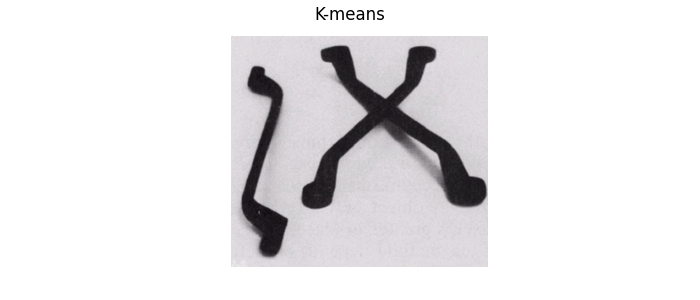

In [ ]:
img = plt.imread('images/tools.bmp')
app = MyKmeansApp(img, num_clusters=3, weightXY=0.0)
app.run()


<img src="images/Figure 11.png" width="875" height="375">

In [ ]:
print("Energy: ", app.energy)

Energy:  24189619.765710793


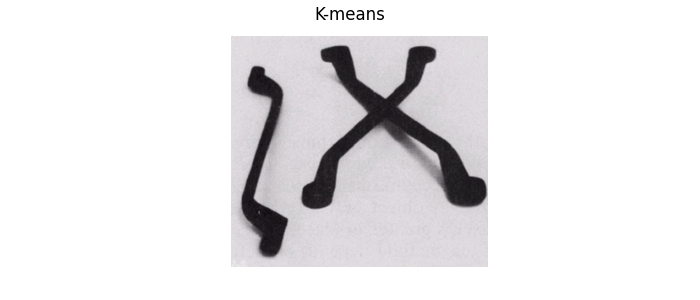

In [ ]:
img = plt.imread('images/tools.bmp')
app = MyKmeansApp(img, num_clusters=3, weightXY=0.1)
app.run()

<img src="images/Figure 12.png" width="875" height="375">

In [ ]:
print("Energy: ", app.energy)

Energy:  138616676.2788942


We see that keeping the parameters the same, random initialization creates two very different results. 

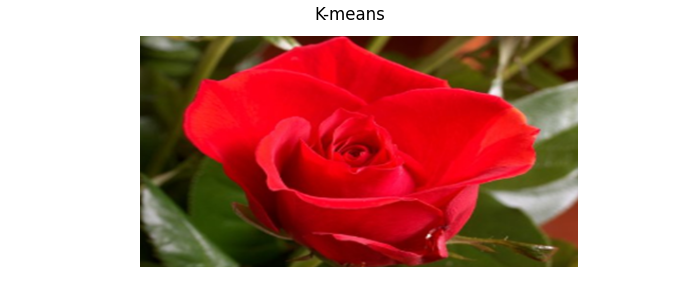

In [ ]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=3, weightXY=0.2)
app.run()

<img src="images/Figure 13.png" width="875" height="375">

In [ ]:
print("Energy: ", app.energy)

Energy:  652550017.1139789


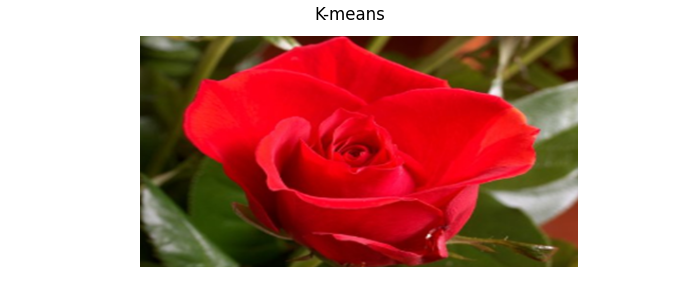

In [ ]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=4, weightXY=0.5)
app.run()

<img src="images/Figure 14.png" width="875" height="375">

In [ ]:
print("Energy: ", app.energy)

Energy:  841619100.0349394


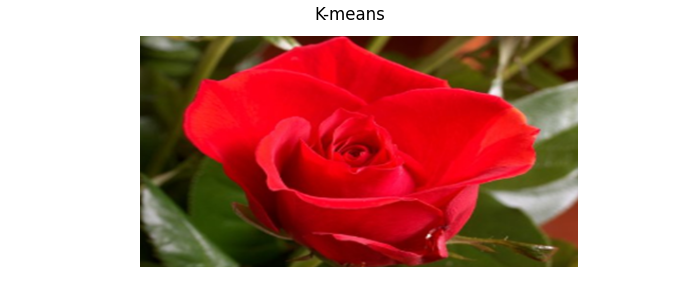

In [ ]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=9, weightXY=0.01)
app.run()

<img src="images/Figure 15.png" width="875" height="375">

In [ ]:
print("Energy: ", app.energy)

Energy:  84554761.57340406


There is little difference in the segmentation between $k=3$ and $k=4$, however for $k=9$, the segmentation is able to distinguish the different contours in the rose. 

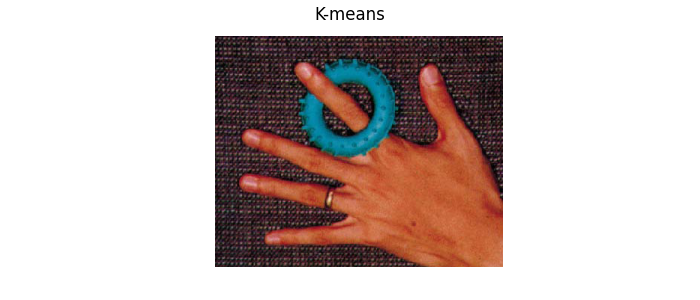

In [ ]:
img = plt.imread('images/hand.bmp')
app = MyKmeansApp(img, num_clusters=7, weightXY=5)
app.run()

<img src="images/Figure 16.png" width="875" height="375">

In [ ]:
print("Energy: ", app.energy)

Energy:  2304850720.863342


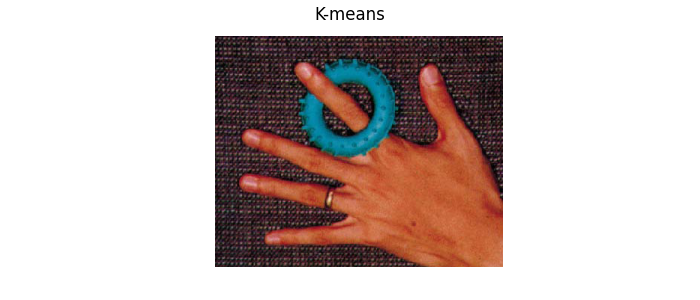

In [ ]:
img = plt.imread('images/hand.bmp')
app = MyKmeansApp(img, num_clusters=20, weightXY=0.5)
app.run()

<img src="images/Figure 17.png" width="875" height="375">

In [ ]:
print("Energy: ", app.energy)

Energy:  234971330.2445832


With more clusters, the texture of the fabric is able to be distinguished in the background.

### We use K-means to generate 3-4 representative results with color quantization and superpixels. We experiment with different values of parameter K (in the range 2-80). 

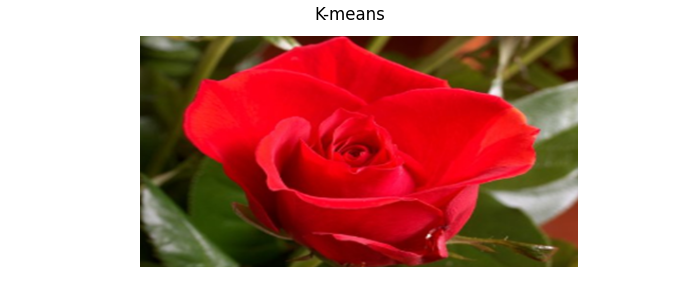

In [ ]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=2, weightXY=2.0)
app.run()

<img src="images/Figure 18.png" width="875" height="375">

In [ ]:
print("Optimal SSE:", app.energy)

Optimal SSE: 3220168632.096231


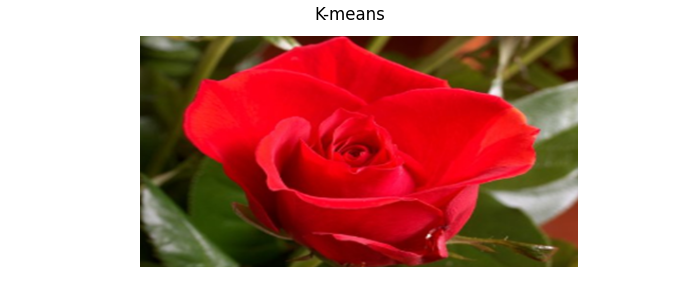

In [ ]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=25, weightXY=2.0)
app.run()

<img src="images/Figure 19.png" width="875" height="375">

In [ ]:
print("Optimal SSE:", app.energy)

Optimal SSE: 638941828.5857439


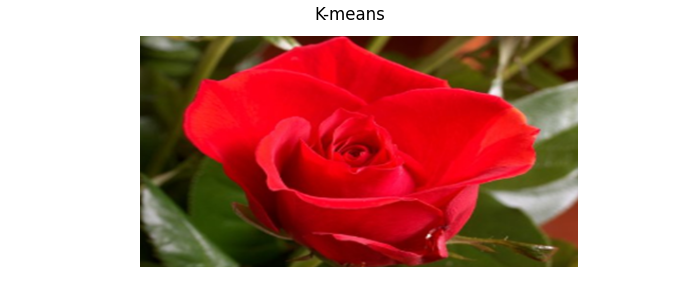

In [ ]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=55, weightXY=2.0)
app.run()

<img src="images/Figure 20.png" width="875" height="375">

In [ ]:
print("Optimal SSE:", app.energy)

Optimal SSE: 392431644.3675668


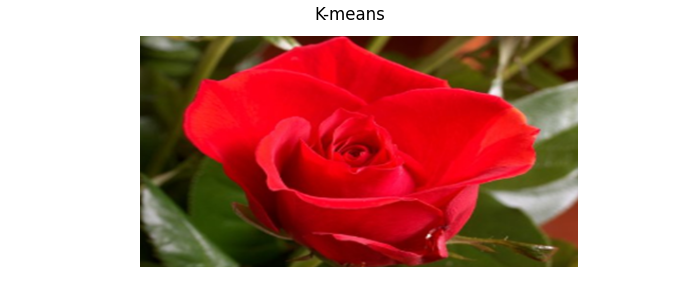

In [ ]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=80, weightXY=2.0)
app.run()

<img src="images/Figure 21.png" width="875" height="375">

In [ ]:
print("Optimal SSE:", app.energy)

Optimal SSE: 306928894.2071358


For the lower $k$, the segments are less precise and smaller sections are grouped together so the optimal SSE is higher. As we increase $k$, the segments become more precise and segment the smaller sections of the flower. As a result, the optimal SSE decreases. However as we increase $k$, the decrease in the optimal SSE becomes less significant. From $k=2$ to $k= 25$, the decrease is in the order of $10^{10}$. From $k=25$ to $k= 55$, the decrease is in the order of $10^9$. From $k=55$ to $k = 80$, the decrease is in the order of $10^8$. This is because as $k$ increases the proportion of clusters that are empty increases. So the effect of increasing the number of available clusters has a diminishing impact.